In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy
from collections import Counter

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from unidecode import unidecode
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud, STOPWORDS

# Carregar o modelo de português do spaCy
nlp = spacy.load("pt_core_news_sm")



In [2]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('portuguese'))



custom_stopwords = {
    't', 'be', 'nao', 'youtu', 'vai', 'av', 'ja', 'to', 'the', 'this', 'i', 'and', 
    'you', 'y', 'www', 'sao', 'pois', 'contra', 'user', 'ai', 'so', 'gente', 'voce', 'of', 
    'ola', 'gift', 'card', 'kwaivideo', 'r', 'bom', 'q', 'vc', 'vcs', 'pra','ta', 'phone', 'ok', 'la',
    'sera', 'ha', 'aqui', 'ate', 'dia', 'mc', 'im', 'tmj', 'pix', 'g', 'diz', 'ti', 'etc', 'tudo', 
    'todo', 'toda', 'youtube', 'g1', 'm', 'instagram', 'fb', 'in', 'link', 'was', 'blocked', 'kk'
}

stop_words.update(custom_stopwords)

def preprocess_text(text):

    # Função para extrair e substituir o domínio da URL
    def substituir_dominios(texto):
        # Função para extrair e substituir o domínio da URL
        def extrair_dominio(url):
            # Remove o protocolo (http://, https://, etc.) e o "www." se presente
            dominio = re.sub(r'^https?://(?:www\.)?|www\.', '', url)
            # Remove o caminho e parâmetros da URL
            dominio = re.split(r'[/?#]', dominio)[0]
            # Retorna a parte principal do domínio (antes do primeiro ponto)
            return dominio.split('.')[0]

        # Substitui URLs por seus domínios principais
        return re.sub(r'https?://(?:www\.)?\S+|www\.\S+', lambda match: extrair_dominio(match.group(0)), texto)

    # Substituir domínios
    text = substituir_dominios(text)

    # Converte para minúsculas
    text = text.lower()

    # Remove acentos
    text = unidecode(text)

    #Remover Pontuação
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove URLs e menções
    #text = re.sub(r'http\S+|www\S+|https\S+|@\w+', '', text)

    # Substitui emojis repetidos por apenas um
    text = re.sub(r'([\U00010000-\U0010FFFF])\1+', r'\1', text)
    text = re.sub(r'([\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]|[\U0001F780-\U0001F7FF]|[\U0001F800-\U0001F8FF]|[\U0001F900-\U0001F9FF]|[\U0001FA00-\U0001FA6F]|[\U0001FA70-\U0001FAFF])\1+', r'\1', text)


    # Remove espaços em branco extras (início ou final) e múltiplos espaços no meio do texto
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove pontuações e caracteres especiais
    #text = re.sub(r'[^\w\s]', '', text)

    # Ajusta risadas "kkk" ou mais para "kk"
    text = re.sub(r'k{2,}|K{2,}', 'kk', text)

    # Ajusta risadas "haha" ou mais para "haha"
    text = re.sub(r'(ha){2,}', 'haha', text, flags=re.IGNORECASE)

    # Ajusta risadas "kaka" ou mais para "kaka"
    text = re.sub(r'(ka){2,}', 'kaka', text, flags=re.IGNORECASE)

    # Remove as stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])


    return text


[nltk_data] Downloading package punkt to C:\Users\Melissa
[nltk_data]     Felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Melissa
[nltk_data]     Felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Melissa
[nltk_data]     Felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Telegram

In [3]:
df_telegram = pd.read_csv('../datasets/fakeTelegram.BR_2022.csv')
df_telegram.head()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Wanda Silva,Texto,telegram,NaN,NaN
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Wanda Silva,Texto,telegram,NaN,NaN
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Wanda Silva,Texto,telegram,NaN,NaN
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Wanda Silva,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,NaN,5,2022-10-05 06:28:29.316325,NaN,NaN,507185,Wanda Silva,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637


In [4]:
ids_para_remover = ['b73c0b674b28d87375d78dcae2f1a21f','62b3aa83e4df122e48cb1f97583e403f',
                    '893874da7344daaa00b8b5b3dc295b59','38737f3c7a07586c4efbfa39aa345705',
                    'da4cbbc1b7b1192ad83bcdae613ac2c3', 'bf66a467459264e0d33e4c8518a82827',
                    '46e009035e6150d656d0c194db88fb07','811541f6ce49347d1798e8dd2d3cbf83',
                    '1d2a0a63333d12ad188e9e6f7f2e0419','7c379613d4da713fe959d8c7ddc11ce2',
                    'debe17fd10d504076d2df8682f63bfc6','e9713ae04a02a810d6f33dd956f42794',
                    'd6c77928db26721ce46aca2d549780f0','8e53464d3b01eea3e39d07e51ecbb1b4',
                    'bacd40da04dd7d13f646993bdcf8e79d','2273d1167a6212812d95dc8fadbae78e',
                    'cd3bb1bdf75be7595e6373171a5c2225','add8c1ba533c5e5450d92c061a5ee7bf',
                    'e198f90df1995528531dd43db0c935ea', '06dc9ac55ed64caab2bd97e9ab717302',
                    'c0110feb539d212836605b66192722dd','f71912700ac5331415408ce229681359',
                    '2ee692357a9c948351c43a9540e859ae', '25b66278176dabe814dfc25a405a2470',
                    '08b21cb1e7de74ef5fe1085230075523']

In [5]:
# Filtrar o DataFrame para remover as linhas com esses IDs
df_filtrado_telegram = df_telegram[~df_telegram['id_member_anonymous'].isin(ids_para_remover)]
df_filtrado_telegram

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Wanda Silva,Texto,telegram,NaN,NaN
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Wanda Silva,Texto,telegram,NaN,NaN
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Wanda Silva,Texto,telegram,NaN,NaN
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Wanda Silva,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,NaN,5,2022-10-05 06:28:29.316325,NaN,NaN,507185,Wanda Silva,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557581,2022-11-11 12:06:15,333e9869f23dbd4682d1be382d9c1e59,e56ec342fc599ebb4ed89655eb6f03aa,25e43b6a58b848c43ad5b5f9e979822a.jpg,url,https://terrabrasilnoticias.com/2022/11/bndes-...,True,True,False,"BNDES tem lucro de R$ 9,6 bilhões no terceiro ...",5,2022-11-16 14:49:39.146502,0.1027,NaN,575796,Wanda Silva,Url,telegram,NaN,25e43b6a58b848c43ad5b5f9e979822a
557582,2022-11-11 12:09:08,NaN,5b10d7739171149be6d9961e3350c071,657949d03e4088f6b332e2686ccd3221.jpg,url,https://youtu.be/8g1Vz9_0xVk,True,True,False,https://youtu.be/8g1Vz9_0xVk,5,2022-11-16 14:49:39.847434,0.0000,NaN,1286443,Wanda Silva,Url,telegram,NaN,657949d03e4088f6b332e2686ccd3221
557583,2022-11-11 12:09:47,NaN,1590a03f43b5ba4b6147a1c5e1dd357b,a21848a61045380a6483866daed0ca0e.jpg,image/jpg,https://t.me/vemprasruas,True,True,False,"Empresários, demitam os petistas primeiro.\n\n...",5,2022-11-16 14:49:39.922279,0.0000,NaN,13294,Wanda Silva,Imagem,telegram,NaN,a21848a61045380a6483866daed0ca0e
557584,2022-11-11 12:09:46,NaN,5b10d7739171149be6d9961e3350c071,a21848a61045380a6483866daed0ca0e.jpg,image/jpg,https://t.me/vemprasruas,True,True,False,"Empresários, demitam os petistas primeiro.\n\n...",5,2022-11-16 14:49:39.992932,0.0000,NaN,1286444,Wanda Silva,Imagem,telegram,NaN,a21848a61045380a6483866daed0ca0e


In [6]:
# Removendo linhas com valores NaN na coluna 'text_content_anonymous'
df_filtrado_telegram = df_filtrado_telegram.dropna(subset=['text_content_anonymous'])

# Removendo trava_zap
df_filtrado_telegram = df_filtrado_telegram[df_filtrado_telegram['trava_zap'] == False]


len(df_filtrado_telegram)

443759

In [7]:

df_geral_telegram = df_filtrado_telegram.copy()

# Aplicar o pré-processamento à coluna de texto
df_geral_telegram['text_processed'] = df_geral_telegram['text_content_anonymous'].apply(preprocess_text)

In [8]:
palavras_religiosas = [
    "deus", "jesus", "misericordia", "davi",
    "salomao", "reino", "templo", "conservador",
    "pentecostal", "rcc", "renovacao", "carismatic",
    "paulo ricardo", "bernardo kuster", "herege", "ateu",
    "jerico", "heresia"
]

# Função para verificar se uma palavra está relacionada à religião
def relacionada_religiao(word):
    word_lower = word.lower()
    palavras_religiosas_lower = [palavra.lower() for palavra in palavras_religiosas]

    # Verificando se alguma palavra da lista de palavras religiosas está presente
    return any(palavra in word_lower for palavra in palavras_religiosas_lower)


df_religiao_telegram = df_geral_telegram[df_geral_telegram['text_processed'].apply(lambda x: relacionada_religiao(x))]


In [9]:
palavras_politicas = [ "lula", "bolsonaro", "pt", "pl", "stf", "patria", "55", "22", "13", "senadores", "lulaladrao",
                       "urnas", "alexandre", "moraes", "comunismo", "eleicao", "eleicoes", "esquerda", "direita",
                         "presidente", "tse", "fraude", "voto", "turno", "ministro"]

def retirar_mensagens_com_palavras_politicas(word):
    word_lower = word.lower()
    palavras_politica_lower = [palavra.lower() for palavra in palavras_politicas]

    return any(palavra in word_lower for palavra in palavras_politica_lower)


df_politico_telegram = df_religiao_telegram[~df_religiao_telegram['text_processed'].apply(lambda x: retirar_mensagens_com_palavras_politicas(x))]

In [10]:
df_politico_telegram.shape

(8526, 21)

## WhatsApp

In [11]:
df_whatsapp = pd.read_csv('../datasets/fakeWhatsApp.BR_2022.csv')
df_whatsapp.head()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5
0,2022-10-10 18:20:24,9d737b3c9387855139bbad2311cc5709,0638569ee76dac58f59dcac20463c955,NaN,NaN,NaN,False,False,False,☝️\nHoje que eu fique sabendo do CANAL LULA FL...,5,2022-10-10 18:20:25.000937,-0.7003,0.843775,F7023FFB06C429A2C166922849A35ED8,558594228826.0:12@s.whatsapp.net,Texto,whatsapp,NaN,NaN
1,2022-10-10 22:02:58,1660a60f661754d2802ca53296e25be8,a5910d5cc1c830ade9eb4dd00f15ff6a,NaN,NaN,NaN,False,False,False,Mais pra que isso não aconteça nois temos quê ...,5,2022-10-10 22:02:58.4682,-0.2960,NaN,A9FAC78070C144890D181EF415B90CAD,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN
2,2022-10-11 00:39:31,c882172d447798d74915973ac83eba68,b84dfe2d1599b82768dcdecce7e6bb23,d2e0ec59ffd9f84764f5b147725d7196.oga,audio/ogg; codecs=opus,NaN,True,False,False,NaN,5,2022-10-11 00:39:33.445125,NaN,NaN,737948BE86D450A426470794F91BC80D,558594228826.0:12@s.whatsapp.net,Audio,whatsapp,NaN,d2e0ec59ffd9f84764f5b147725d7196
3,2022-10-10 23:36:19,91e3c22c08b24ba01ac4524d77bcb1da,addb88a34374d43aa9ecd4df7359ce39,NaN,NaN,NaN,False,False,False,‎Acesse este link para entrar no meu grupo do ...,5,2022-10-10 23:36:19.724987,-0.1531,NaN,439A91ADD8F355CD23C4BB107A5E88BB,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN
4,2022-10-10 23:40:12,77c1a8a31fee269db258a028a61f0b88,a5831b109d4d95fae8ee0ce464e48a6a,bb80cd530332bb6b95c34e719992d249.f4v,video/mp4,NaN,True,False,False,NaN,5,2022-10-10 23:40:14.397495,NaN,NaN,092203A082AC3DFB2A4933F60453AEB8,558594228826.0:12@s.whatsapp.net,Video,whatsapp,NaN,bb80cd530332bb6b95c34e719992d249


In [12]:
ids_para_remover = ['6ef561ec0f448afcd7b3751124bb0712','d3e678a0ba0e1485548260a7c4599152',
                    'ac5703154484de05336af617455ca55e','a39edbd64d378226ffa60433649a0acf',
                    'c66d0d4ae5a4b281bff67e1fa4fbd6ba','819bbc872ed6d81f44d746b710eecf06',
                    'ec94da4d54f9a5693e88fa582926be53','6a38c72316d87c028dfd66c10442476b',
                    '94099e1e46f129856541e2b3640896d1','8f367d1693fff47218603fa47ded525c',
                    'c09caffee0d1bd30926dea9df25dc88f']

In [13]:
# Filtrar o DataFrame para remover as linhas com esses IDs
df_filtrado_whatsapp = df_whatsapp[~df_whatsapp['id_member_anonymous'].isin(ids_para_remover)]
df_filtrado_whatsapp

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5
0,2022-10-10 18:20:24,9d737b3c9387855139bbad2311cc5709,0638569ee76dac58f59dcac20463c955,NaN,NaN,NaN,False,False,False,☝️\nHoje que eu fique sabendo do CANAL LULA FL...,5,2022-10-10 18:20:25.000937,-0.7003,0.843775,F7023FFB06C429A2C166922849A35ED8,558594228826.0:12@s.whatsapp.net,Texto,whatsapp,NaN,NaN
1,2022-10-10 22:02:58,1660a60f661754d2802ca53296e25be8,a5910d5cc1c830ade9eb4dd00f15ff6a,NaN,NaN,NaN,False,False,False,Mais pra que isso não aconteça nois temos quê ...,5,2022-10-10 22:02:58.4682,-0.2960,NaN,A9FAC78070C144890D181EF415B90CAD,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN
2,2022-10-11 00:39:31,c882172d447798d74915973ac83eba68,b84dfe2d1599b82768dcdecce7e6bb23,d2e0ec59ffd9f84764f5b147725d7196.oga,audio/ogg; codecs=opus,NaN,True,False,False,NaN,5,2022-10-11 00:39:33.445125,NaN,NaN,737948BE86D450A426470794F91BC80D,558594228826.0:12@s.whatsapp.net,Audio,whatsapp,NaN,d2e0ec59ffd9f84764f5b147725d7196
3,2022-10-10 23:36:19,91e3c22c08b24ba01ac4524d77bcb1da,addb88a34374d43aa9ecd4df7359ce39,NaN,NaN,NaN,False,False,False,‎Acesse este link para entrar no meu grupo do ...,5,2022-10-10 23:36:19.724987,-0.1531,NaN,439A91ADD8F355CD23C4BB107A5E88BB,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN
4,2022-10-10 23:40:12,77c1a8a31fee269db258a028a61f0b88,a5831b109d4d95fae8ee0ce464e48a6a,bb80cd530332bb6b95c34e719992d249.f4v,video/mp4,NaN,True,False,False,NaN,5,2022-10-10 23:40:14.397495,NaN,NaN,092203A082AC3DFB2A4933F60453AEB8,558594228826.0:12@s.whatsapp.net,Video,whatsapp,NaN,bb80cd530332bb6b95c34e719992d249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598966,2022-11-13 00:46:56,b1b419f54664f6cd4fcdb40425862d36,b1b419f54664f6cd4fcdb40425862d36,7719ba57cbe74eb5c8059d6b1a14d1ca.f4v,video/mp4,NaN,True,False,False,NaN,5,2023-01-30 18:20:22.262572,NaN,NaN,08E682716448AB06DEE126A30E7AAA77,558594228826.0:17@s.whatsapp.net,Video,whatsapp,NaN,7719ba57cbe74eb5c8059d6b1a14d1ca
598967,2022-11-13 13:37:03,2ad743e9ff831a75911a983b42205845,64c9a7c8ac338faa258e5aea9a1c2ae3,c6d59f0b86e63dbcce7fc682a1eaea50.f4v,video/mp4,NaN,True,False,False,NaN,5,2023-01-30 18:20:22.269632,NaN,NaN,3EB0259ED9B8FACF18A9,558594228826.0:17@s.whatsapp.net,Video,whatsapp,NaN,c6d59f0b86e63dbcce7fc682a1eaea50
598968,2022-11-13 17:43:22,b1b419f54664f6cd4fcdb40425862d36,b1b419f54664f6cd4fcdb40425862d36,003ace942d9665adc9647df9d9526c0c.jpeg,image/jpeg,NaN,True,False,False,NaN,5,2023-01-30 18:20:22.277283,NaN,NaN,5CD9F23CD07BEE38693E68E11F9C6A55,558594228826.0:17@s.whatsapp.net,Imagem,whatsapp,NaN,003ace942d9665adc9647df9d9526c0c
598969,2022-11-13 21:40:47,b1b419f54664f6cd4fcdb40425862d36,b1b419f54664f6cd4fcdb40425862d36,bab5653a94b097404739a061dbbc7407.f4v,video/mp4,NaN,True,False,False,NaN,5,2023-01-30 18:20:22.284021,NaN,NaN,D3BDE4A5C68E7148C0925F6C582C99A9,558594228826.0:17@s.whatsapp.net,Video,whatsapp,NaN,bab5653a94b097404739a061dbbc7407


In [14]:
# Removendo linhas com valores NaN na coluna 'text_content_anonymous'
df_filtrado_whatsapp = df_filtrado_whatsapp.dropna(subset=['text_content_anonymous'])

# Removendo trava_zap
df_filtrado_whatsapp = df_filtrado_whatsapp[df_filtrado_whatsapp['trava_zap'] == False]


len(df_filtrado_whatsapp)

254480

In [15]:

df_geral_whatsapp = df_filtrado_whatsapp.copy()

# Aplicar o pré-processamento à coluna de texto
df_geral_whatsapp['text_processed'] = df_geral_whatsapp['text_content_anonymous'].apply(preprocess_text)

In [16]:
palavras_religiosas = [
    "deus", "jesus", "misericordia", "davi",
    "salomao", "reino", "templo", "conservador",
    "pentecostal", "rcc", "renovacao", "carismatic",
    "paulo ricardo", "bernardo kuster", "herege", "ateu",
    "jerico", "heresia"
]

# Função para verificar se uma palavra está relacionada à religião
def relacionada_religiao(word):
    word_lower = word.lower()
    palavras_religiosas_lower = [palavra.lower() for palavra in palavras_religiosas]

    # Verificando se alguma palavra da lista de palavras religiosas está presente
    return any(palavra in word_lower for palavra in palavras_religiosas_lower)


df_religiao_whatsapp = df_geral_whatsapp[df_geral_whatsapp['text_processed'].apply(lambda x: relacionada_religiao(x))]


In [17]:
palavras_politicas = [ "lula", "bolsonaro", "pt", "pl", "stf", "patria", "55", "22", "13", "senadores", "lulaladrao",
                       "urnas", "alexandre", "moraes", "comunismo", "eleicao", "eleicoes", "esquerda", "direita",
                         "presidente", "tse", "fraude", "voto", "turno", "ministro"]

def retirar_mensagens_com_palavras_politicas(word):
    word_lower = word.lower()
    palavras_politica_lower = [palavra.lower() for palavra in palavras_politicas]

    return any(palavra in word_lower for palavra in palavras_politica_lower)


df_politico_whatsapp = df_religiao_whatsapp[~df_religiao_whatsapp['text_processed'].apply(lambda x: retirar_mensagens_com_palavras_politicas(x))]

In [18]:
df_politico_whatsapp.shape

(5167, 21)

# Polaridade

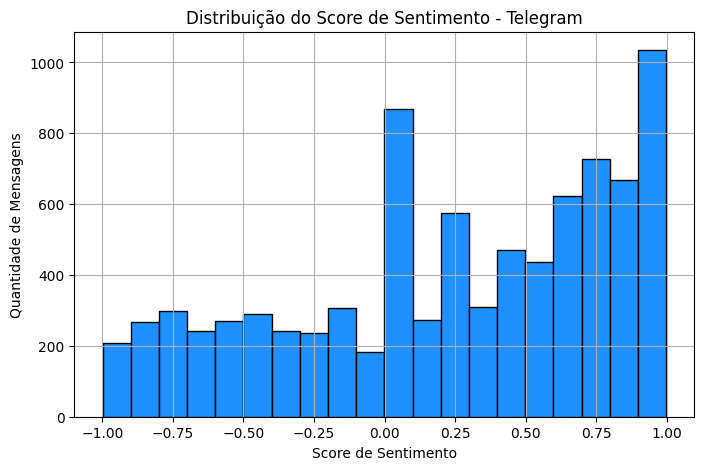

In [30]:
# Telegram

plt.figure(figsize=(8, 5))
plt.hist(df_politico_telegram['score_sentiment'], bins=20, color='dodgerblue', edgecolor='black')
plt.title('Distribuição do Score de Sentimento - Telegram')
plt.xlabel('Score de Sentimento')
plt.ylabel('Quantidade de Mensagens')
plt.grid(True)
plt.show()


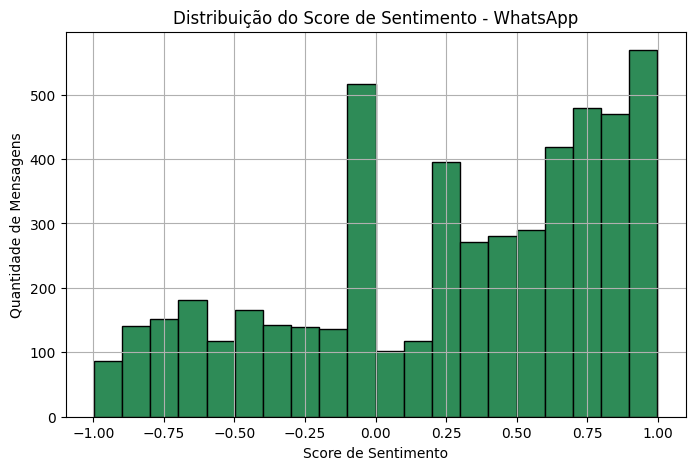

In [29]:
# WhatsApp


plt.figure(figsize=(8, 5))
plt.hist(df_politico_whatsapp['score_sentiment'], bins=20, color='seagreen', edgecolor='black')
plt.title('Distribuição do Score de Sentimento - WhatsApp')
plt.xlabel('Score de Sentimento')
plt.ylabel('Quantidade de Mensagens')
plt.grid(True)
plt.show()


# Nuvem de palavras

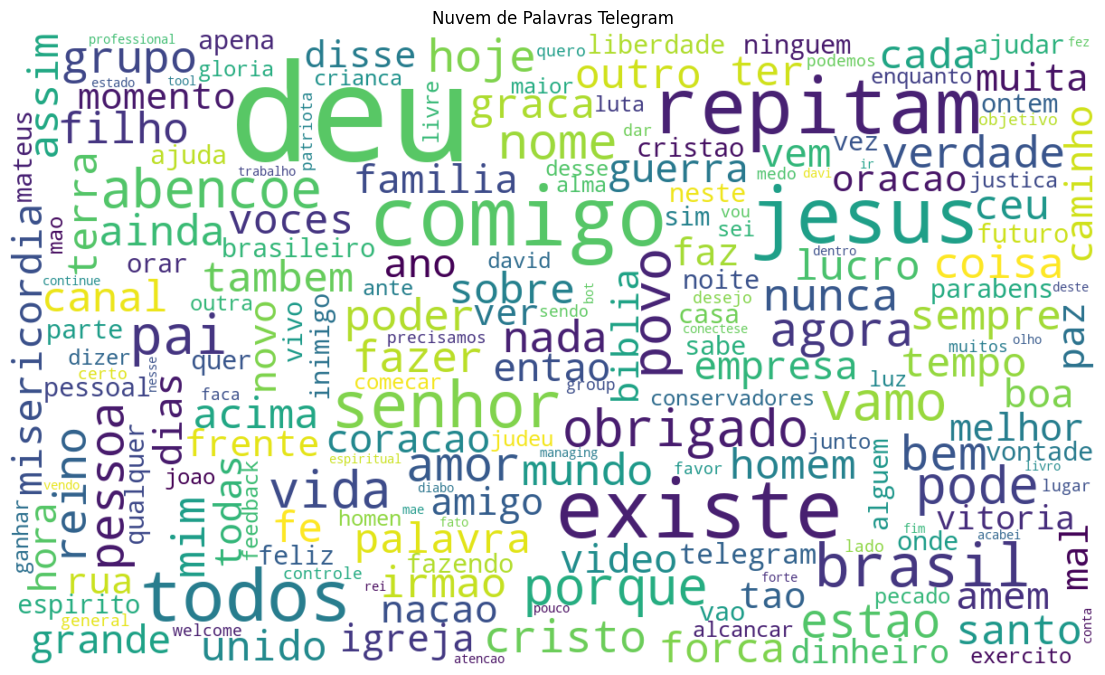

In [ ]:

text_telegram = ' '.join(df_politico_telegram['text_processed'].dropna().astype(str).tolist())

wordcloud = WordCloud(
    width=1200,             
    height=700,             
    background_color="white", 
    min_font_size=10,       
    max_font_size=150,      
    random_state=42,        
    colormap='viridis',    
    collocations=False     
).generate(text_telegram) 

plt.figure(figsize=(14, 10)) # Tamanho da figura para exibição
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Remove os eixos
plt.title("Nuvem de Palavras Telegram")
plt.show()


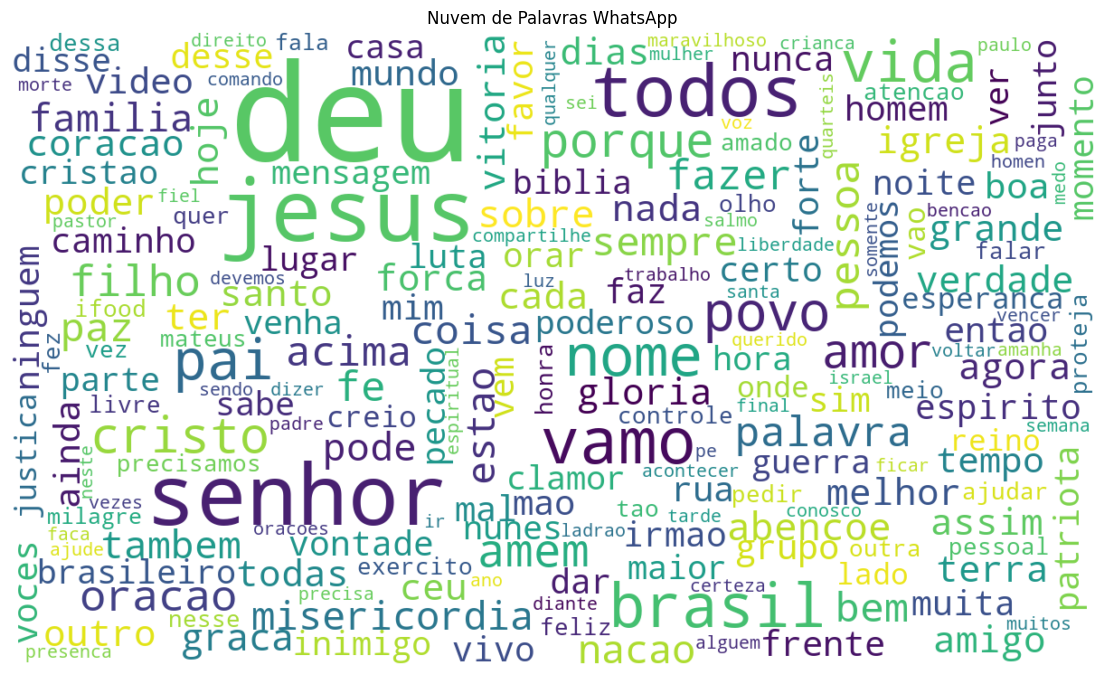

In [30]:

text_whatsapp= ' '.join(df_politico_whatsapp['text_processed'].dropna().astype(str).tolist())

wordcloud = WordCloud(
    width=1200,             
    height=700,             
    background_color="white", 
    min_font_size=10,       
    max_font_size=150,      
    random_state=42,        
    colormap='viridis',    
    collocations=False     
).generate(text_whatsapp) 

plt.figure(figsize=(14, 10)) # Tamanho da figura para exibição
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Remove os eixos
plt.title("Nuvem de Palavras WhatsApp")
plt.show()


# Análise da quantidade de mensagens por dia

In [ ]:
df_politico_whatsapp.loc[:, 'date_message'] = pd.to_datetime(df_politico_whatsapp['date_message'])
df_politico_whatsapp.loc[:, 'date'] = df_politico_whatsapp['date_message'].dt.date


mensagens_por_dia_whatsapp = df_politico_whatsapp.groupby('date').size()


start_date_whatsapp = mensagens_por_dia_whatsapp.index.min()
end_date_whatsapp = mensagens_por_dia_whatsapp.index.max()

all_dates_whatsapp = pd.date_range(start=start_date_whatsapp, end=end_date_whatsapp, freq='D').date
mensagens_por_dia_whatsapp = mensagens_por_dia_whatsapp.reindex(all_dates_whatsapp, fill_value=0)


df_politico_telegram.loc['date_message'] = pd.to_datetime(df_politico_telegram['date_message'])
df_politico_telegram.loc['date'] = df_politico_telegram['date_message'].dt.date

mensagens_por_dia_telegram = df_politico_telegram.groupby('date').size()

# Garantir que todos os dias no período estejam presentes
start_date_telegram = mensagens_por_dia_telegram.index.min()
end_date_telegram = mensagens_por_dia_telegram.index.max()

all_dates_telegram = pd.date_range(start=start_date_telegram, end=end_date_telegram, freq='D').date
mensagens_por_dia_telegram = mensagens_por_dia_telegram.reindex(all_dates_telegram, fill_value=0)


C:\Users\Melissa Felipe\AppData\Local\Temp\ipykernel_22904\1748046511.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_politico_telegram.loc['date_message'] = pd.to_datetime(df_politico_telegram['date_message'])
C:\Users\Melissa Felipe\AppData\Local\Temp\ipykernel_22904\1748046511.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_politico_telegram.loc['date'] = df_politico_telegram['date_message'].dt.date
C:\Users\Melissa Felipe\AppData\Local\Temp\ipykernel_22904\1748046511.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [33]:
minimo = df_politico_whatsapp['date_message'].min()
maximo = df_politico_whatsapp['date_message'].max()

print(maximo)
print(minimo)

2022-11-10 12:27:32
2022-09-27 00:10:47


In [34]:
minimo = df_politico_telegram['date_message'].min()
maximo = df_politico_telegram['date_message'].max()

print(maximo)
print(minimo)

2022-11-11 11:57:13
2022-09-29 00:00:11


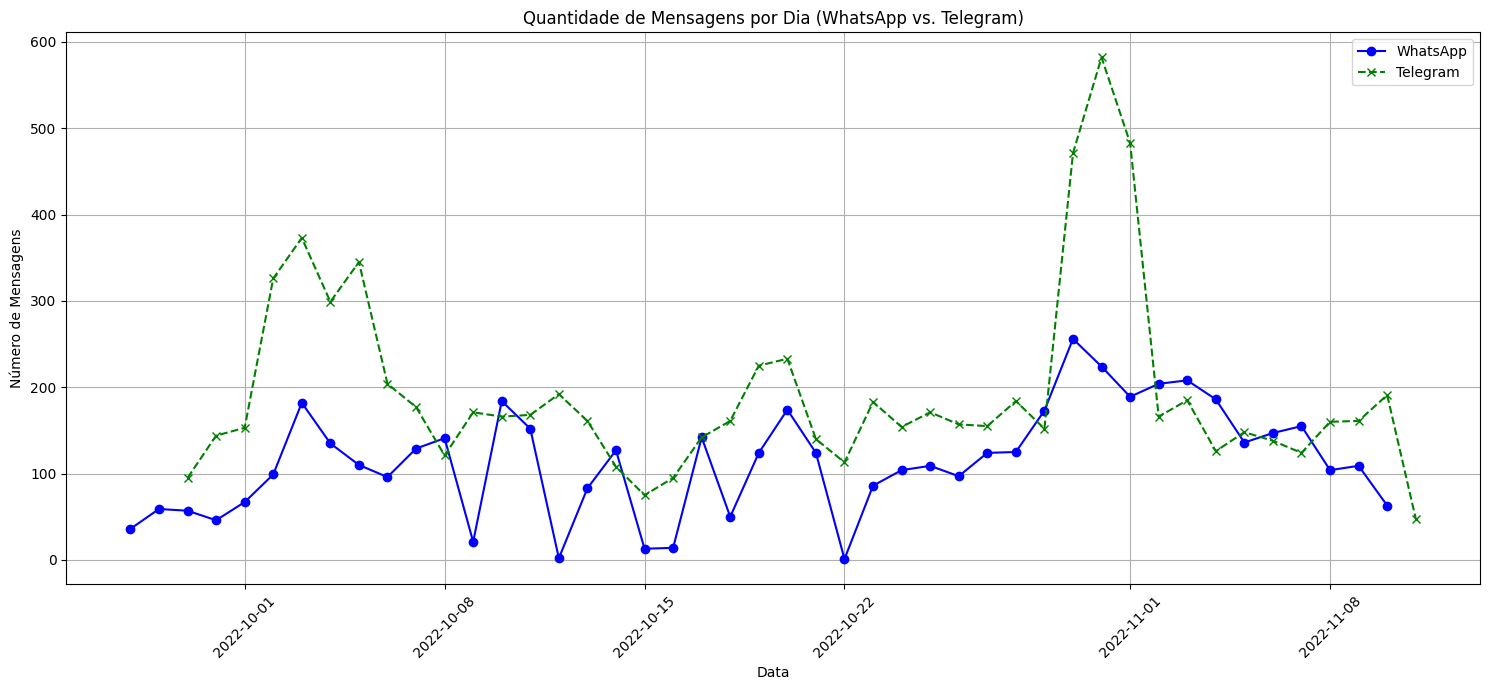

In [32]:
# --- 4. Plotar o Gráfico de Linha ---
plt.figure(figsize=(15, 7))

# Plotar WhatsApp
plt.plot(mensagens_por_dia_whatsapp.index, mensagens_por_dia_whatsapp.values,
         label='WhatsApp', marker='o', linestyle='-', color='blue')

# Plotar Telegram
plt.plot(mensagens_por_dia_telegram.index, mensagens_por_dia_telegram.values,
         label='Telegram', marker='x', linestyle='--', color='green')

plt.title('Quantidade de Mensagens por Dia (WhatsApp vs. Telegram)')
plt.xlabel('Data')
plt.ylabel('Número de Mensagens')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) # Rotacionar rótulos do eixo X para melhor leitura
plt.tight_layout() # Ajustar layout para evitar sobreposição
plt.show()
